<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 152.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 165.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.7 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-05 15:28:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.6MB/s    in 2.7s    

2025-08-05 15:28:44 (56.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
import sqlite3
conn = sqlite3.connect("survey-data.sqlite")
df.to_sql("main", conn, if_exists="replace", index=False)


65437

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import seaborn as sns

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [7]:
query = """
SELECT  ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

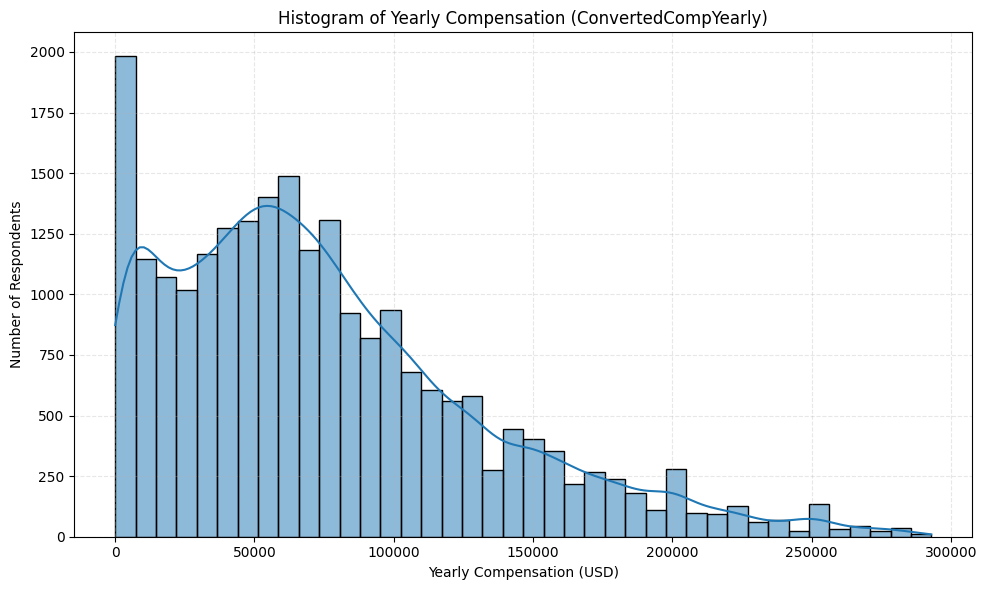

In [12]:

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_clean = df.dropna(subset=['ConvertedCompYearly'])

comp_limit = df_clean['ConvertedCompYearly'].quantile(0.98)
df_clean = df_clean[df_clean['ConvertedCompYearly'] <= comp_limit]

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['ConvertedCompYearly'], bins=40, kde=True)
plt.title('Histogram of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [13]:
query = """
SELECT  Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

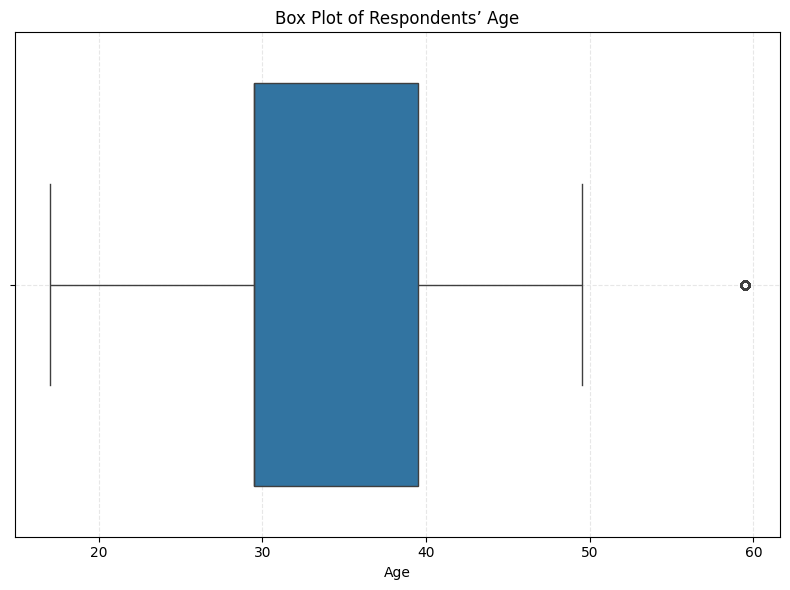

In [10]:

def map_age_to_numeric(age_str):
    try:
        if '-' in age_str:
            age_str = age_str.replace(' years old', '').strip()
            low, high = age_str.split('-')
            return (int(low.strip()) + int(high.strip())) / 2  # mean of the range
        elif 'Under' in age_str:
            return 17  # approximate for 'Under 18'
        elif '65 or older' in age_str:
            return 70  # approximate upper age
        else:
            return None
    except:
        return None

df['AgeMapped'] = df['Age'].apply(map_age_to_numeric)

df_age = df.dropna(subset=['AgeMapped'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_age['AgeMapped'])
plt.title('Box Plot of Respondents’ Age')
plt.xlabel('Age')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [15]:
query = """
SELECT  ConvertedCompYearly , Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

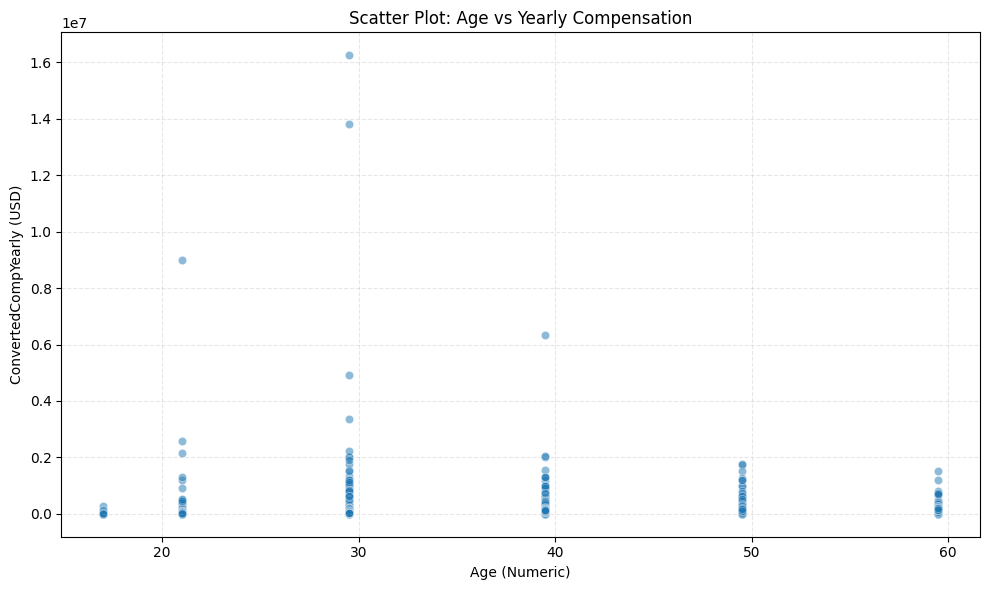

In [16]:

df['Age_numeric'] = df['Age'].apply(map_age_to_numeric)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df_clean = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Age_numeric', y='ConvertedCompYearly', alpha=0.5)
plt.title('Scatter Plot: Age vs Yearly Compensation')
plt.xlabel('Age (Numeric)')
plt.ylabel('ConvertedCompYearly (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


In [8]:
query = """
SELECT ConvertedCompYearly, Age, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND Age IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


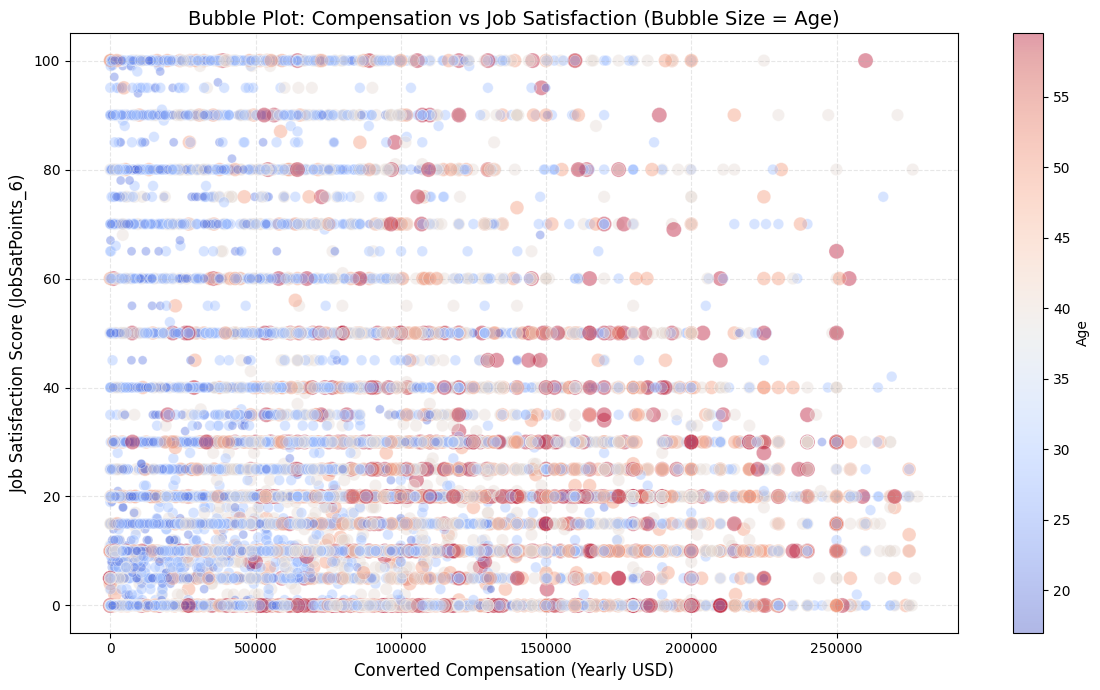

In [11]:

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')



df['Age_numeric'] = df['Age'].apply(map_age_to_numeric)

df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

threshold = df_clean['ConvertedCompYearly'].quantile(0.98)
df_clean = df_clean[df_clean['ConvertedCompYearly'] <= threshold]

plt.figure(figsize=(12, 7))
plt.scatter(
    df_clean['ConvertedCompYearly'],
    df_clean['JobSatPoints_6'],
    s=df_clean['Age_numeric'] * 2,  # bubble size
    alpha=0.4,
    c=df_clean['Age_numeric'],
    cmap='coolwarm',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=14)
plt.xlabel('Converted Compensation (Yearly USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.colorbar(label='Age')
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [12]:
query = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


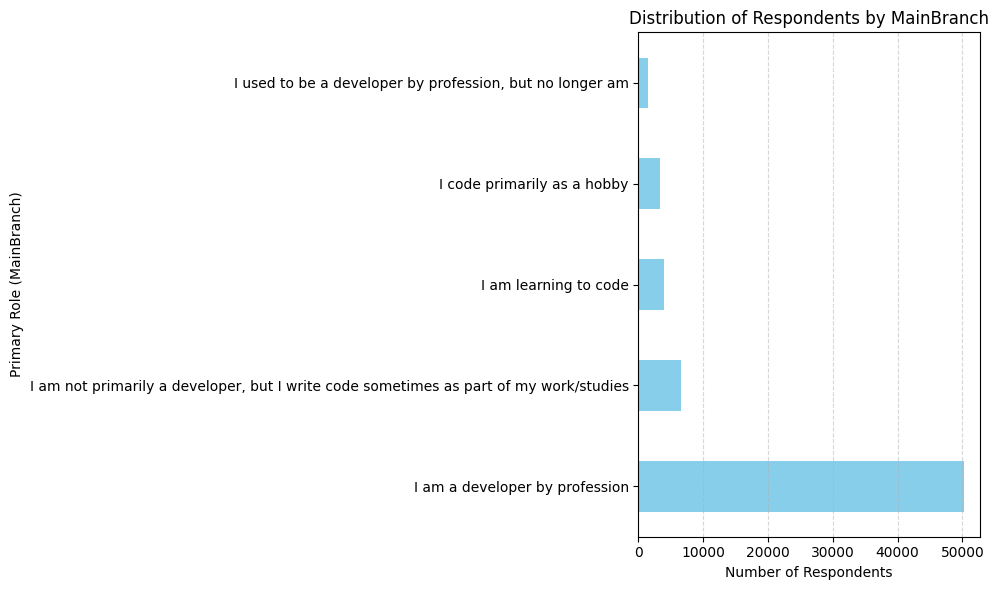

In [13]:
branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role (MainBranch)')
plt.title('Distribution of Respondents by MainBranch')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [14]:
query = """
SELECT LanguageWantToWorkWith
FROM main
WHERE LanguageWantToWorkWith IS NOT NULL
"""
df_lang = pd.read_sql_query(query, conn)

df_lang = df_lang.assign(Language=df_lang['LanguageWantToWorkWith'].str.split(';')).explode('Language')
top_langs = df_lang['Language'].value_counts().nlargest(5)


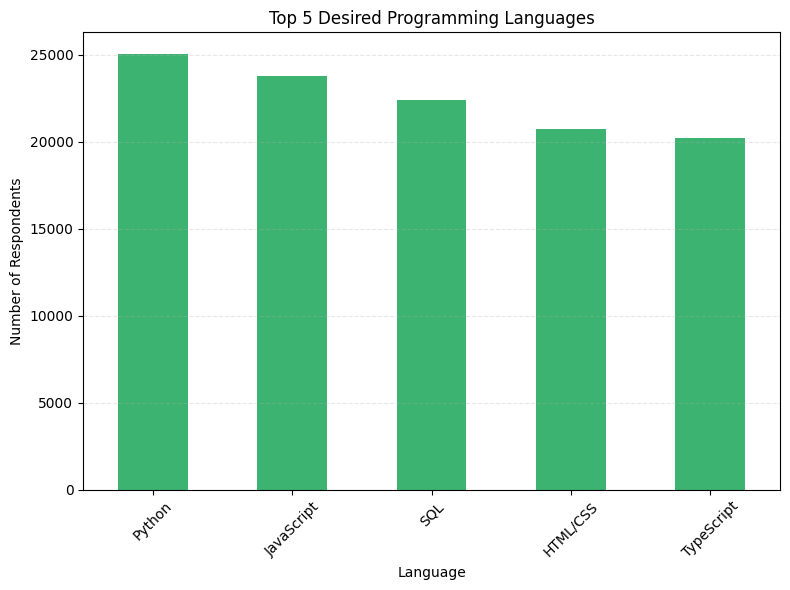

In [15]:
plt.figure(figsize=(8, 6))
top_langs.plot(kind='bar', color='mediumseagreen')
plt.title('Top 5 Desired Programming Languages')
plt.xlabel('Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [23]:
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)


In [24]:
df['AgeNumeric'] = df['Age'].apply(map_age_to_numeric)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

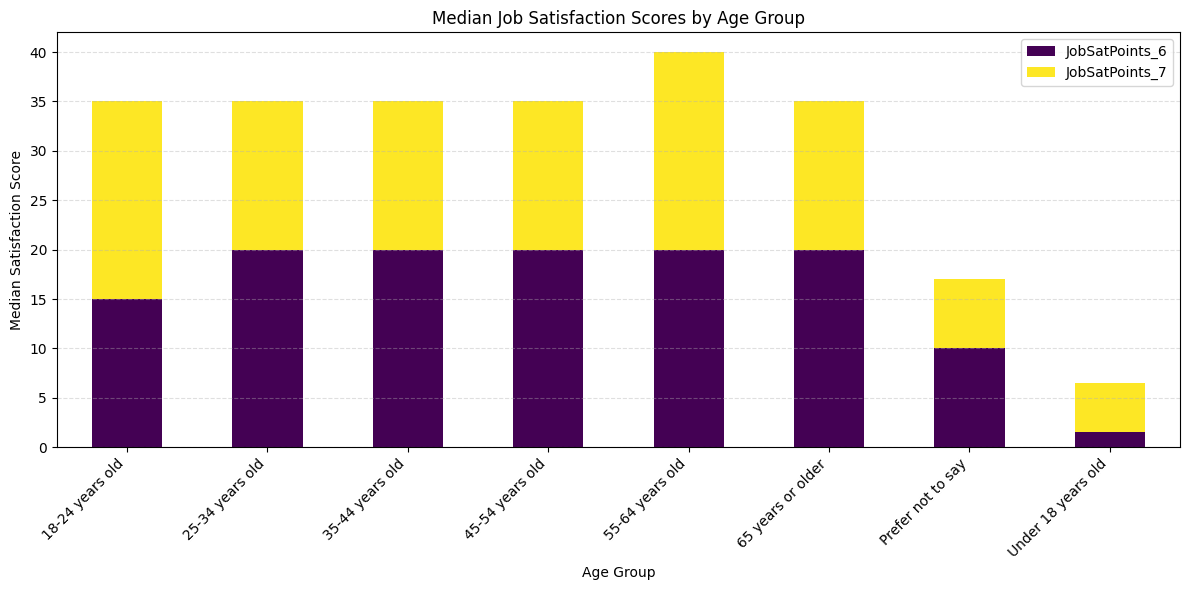

In [29]:
grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Median Job Satisfaction Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [26]:
query = """
SELECT DatabaseHaveWorkedWith
FROM main
WHERE DatabaseHaveWorkedWith IS NOT NULL
"""
df_db = pd.read_sql_query(query, conn)


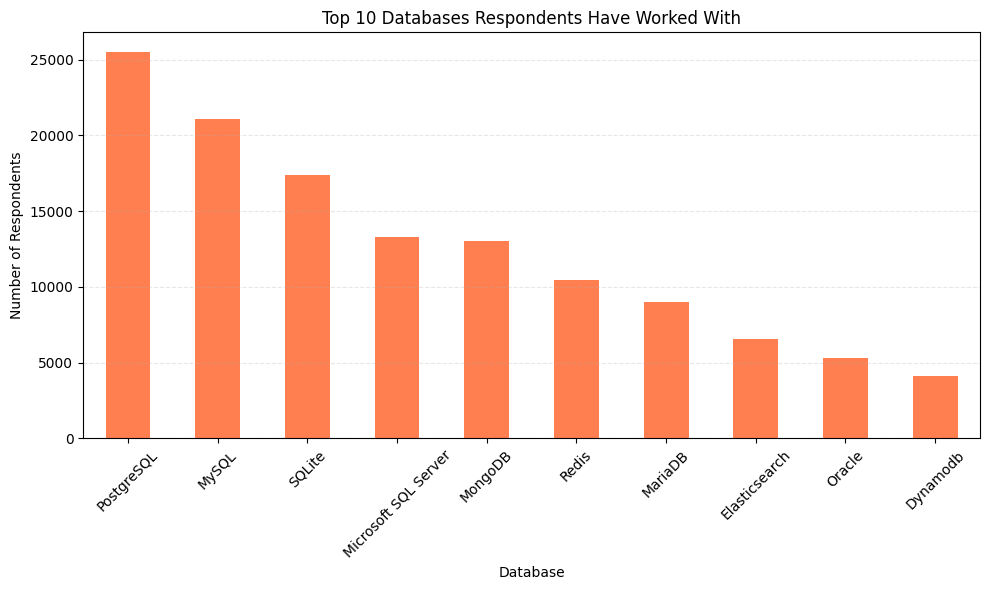

In [27]:
df_db = df_db.assign(Database=df_db['DatabaseHaveWorkedWith'].str.split(';')).explode('Database')
db_counts = df_db['Database'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



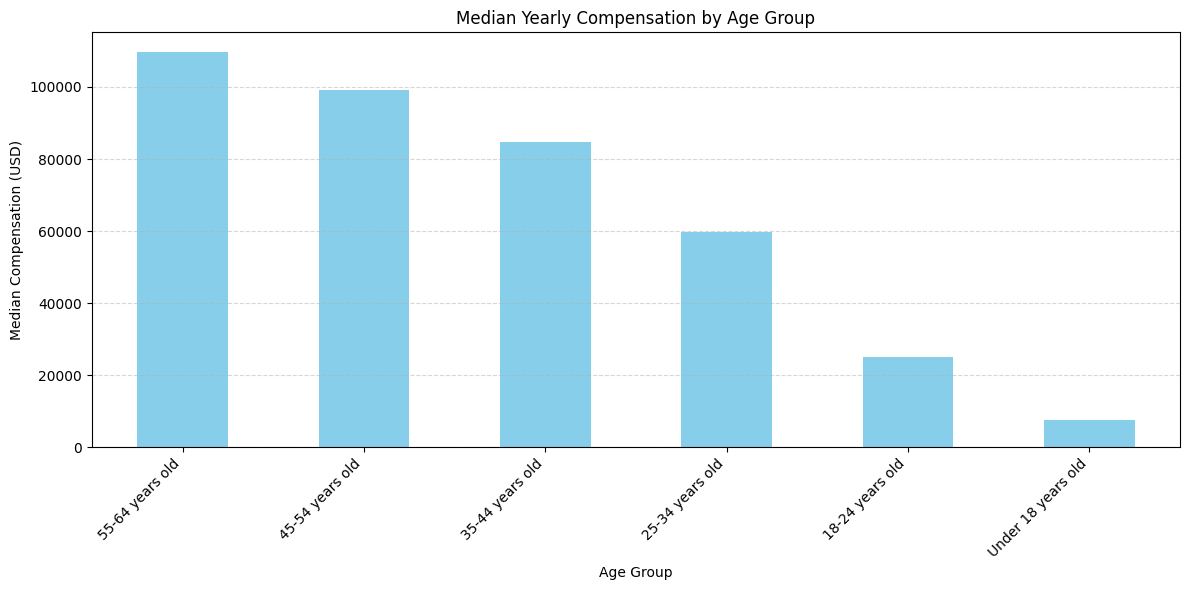

In [30]:
query = """
SELECT Age, ConvertedCompYearly
FROM main
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
df['AgeMapped'] = df['Age'].apply(map_age_to_numeric)
df = df.dropna(subset=['ConvertedCompYearly', 'AgeMapped'])

df_grouped = df.groupby('Age')['ConvertedCompYearly'].median().sort_values(ascending=False)

plt.figure(figsize=(12,6))
df_grouped.plot(kind='bar', color='skyblue')
plt.title('Median Yearly Compensation by Age Group')
plt.ylabel('Median Compensation (USD)')
plt.xlabel('Age Group')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



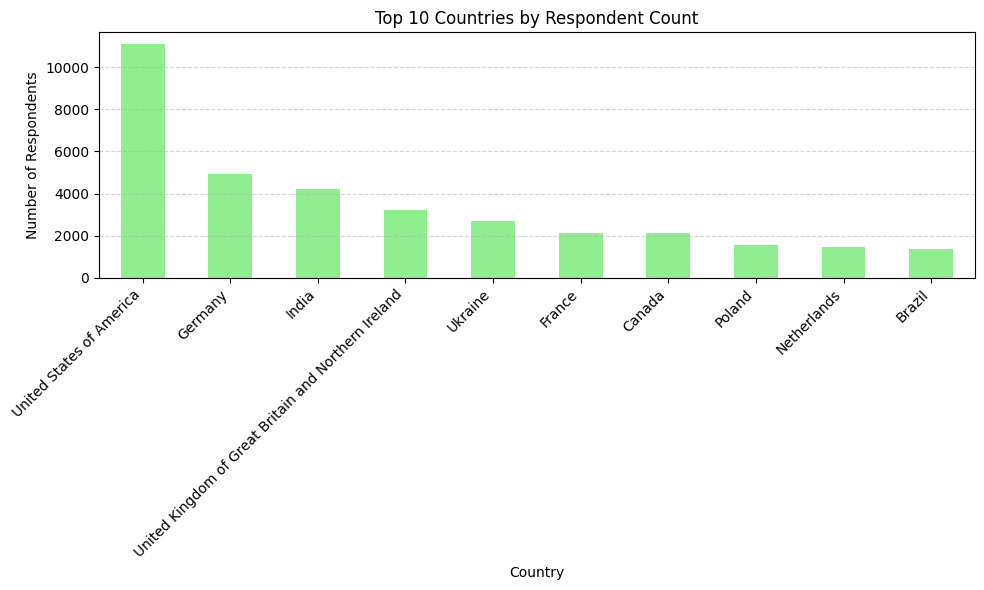

In [31]:
query = """
SELECT Country
FROM main
WHERE Country IS NOT NULL
"""
df_country = pd.read_sql_query(query, conn)

country_counts = df_country['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
conn.close()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
